In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df = pd.read_csv('Students_Performance.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df.head()

,sex,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,paid,...,freetime,goout,Dalc,Walc,health,age,absences,G1,G2,G3
0,F,U,GT3,A,at_home,teacher,mother,yes,no,no,...,3,4,1,1,3,18,6,5,6,6
1,F,U,GT3,T,at_home,other,father,no,yes,no,...,3,3,1,1,3,17,4,5,5,6
2,F,U,LE3,T,at_home,other,mother,yes,no,yes,...,3,2,2,3,3,15,10,7,8,10
3,F,U,GT3,T,health,services,mother,no,yes,yes,...,2,2,1,1,5,15,2,15,14,15
4,F,U,GT3,T,other,other,father,no,yes,yes,...,3,2,1,2,5,16,4,6,10,10


In [ ]:
df.shape

(395, 31)

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.isnull().sum()

,0
sex,0
address,0
famsize,0
Pstatus,0
Mjob,0
Fjob,0
guardian,0
schoolsup,0
famsup,0
paid,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   address     395 non-null    object
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   Mjob        395 non-null    object
 5   Fjob        395 non-null    object
 6   guardian    395 non-null    object
 7   schoolsup   395 non-null    object
 8   famsup      395 non-null    object
 9   paid        395 non-null    object
 10  activities  395 non-null    object
 11  nursery     395 non-null    object
 12  higher      395 non-null    object
 13  internet    395 non-null    object
 14  romantic    395 non-null    object
 15  Medu        395 non-null    int64 
 16  Fedu        395 non-null    int64 
 17  traveltime  395 non-null    int64 
 18  studytime   395 non-null    int64 
 19  failures    395 non-null    int64 
 20  famrel    

**Encoding Variables (One hot encoding)**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), list(range(0, 15)))], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 6 5 6]
 [1.0 0.0 0.0 ... 4 5 5]
 [1.0 0.0 0.0 ... 10 7 8]
 ...
 [0.0 1.0 1.0 ... 3 10 8]
 [0.0 1.0 1.0 ... 0 11 12]
 [0.0 1.0 0.0 ... 5 8 9]]


**Encoding Variables (Label encoding)**


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(15, 26):
    X[:, i] = le.fit_transform(X[:, i])

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 6 5 6]
 [1.0 0.0 0.0 ... 4 5 5]
 [1.0 0.0 0.0 ... 10 7 8]
 ...
 [0.0 1.0 1.0 ... 3 10 8]
 [0.0 1.0 1.0 ... 0 11 12]
 [0.0 1.0 0.0 ... 5 8 9]]


**Exploratory Data Analysis**

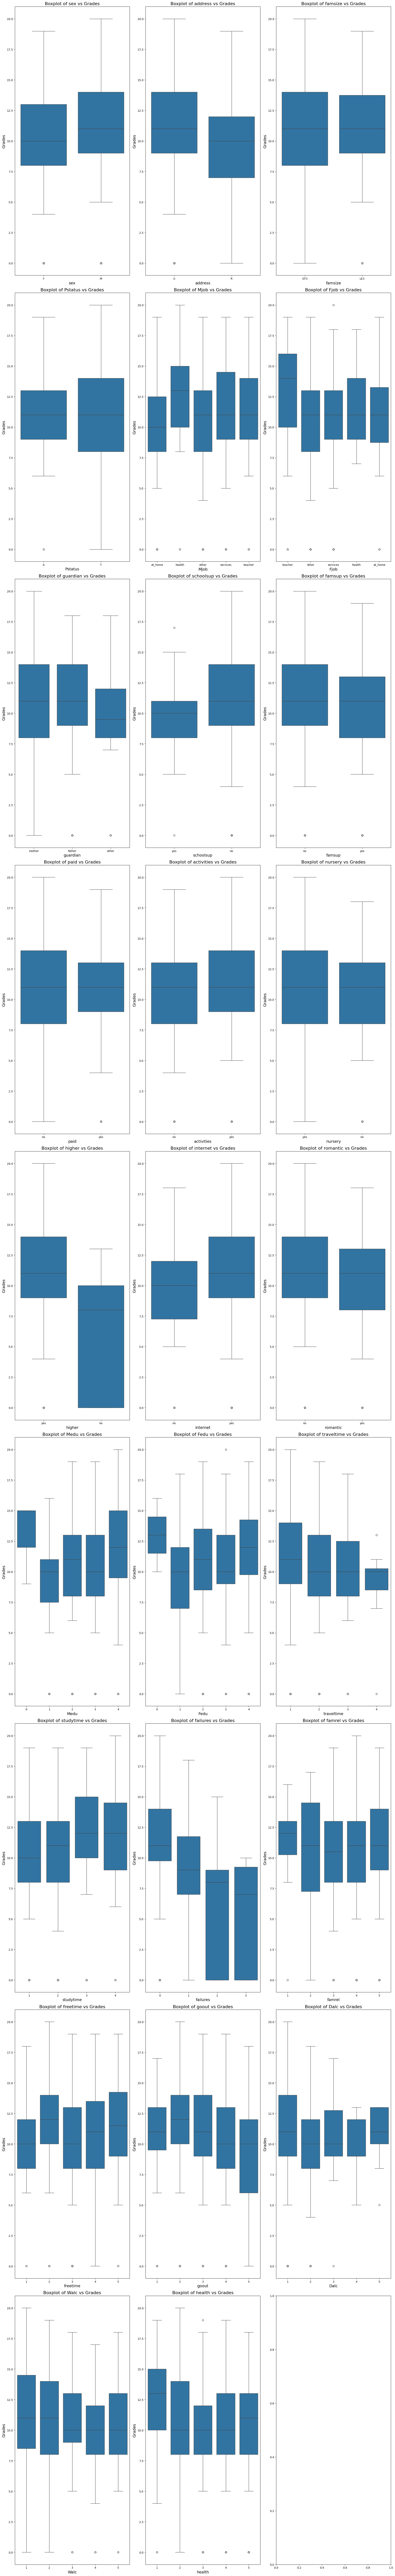

In [ ]:
cols=df.columns[0:26]
fig, axes = plt.subplots(nrows=(len(cols) // 3) + 1, ncols=3, figsize=(20, len(cols) * 5))

# Flatten axes for easy iteration
axes = axes.flatten()
for i, ax in zip(cols, axes):
    sns.boxplot(data=df, ax=ax, x=i, y='G3')  # Boxplot with 'grades' as y-axis
    ax.set_title(f'Boxplot of {i} vs Grades', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Grades', fontsize=14)

plt.tight_layout()
plt.show()

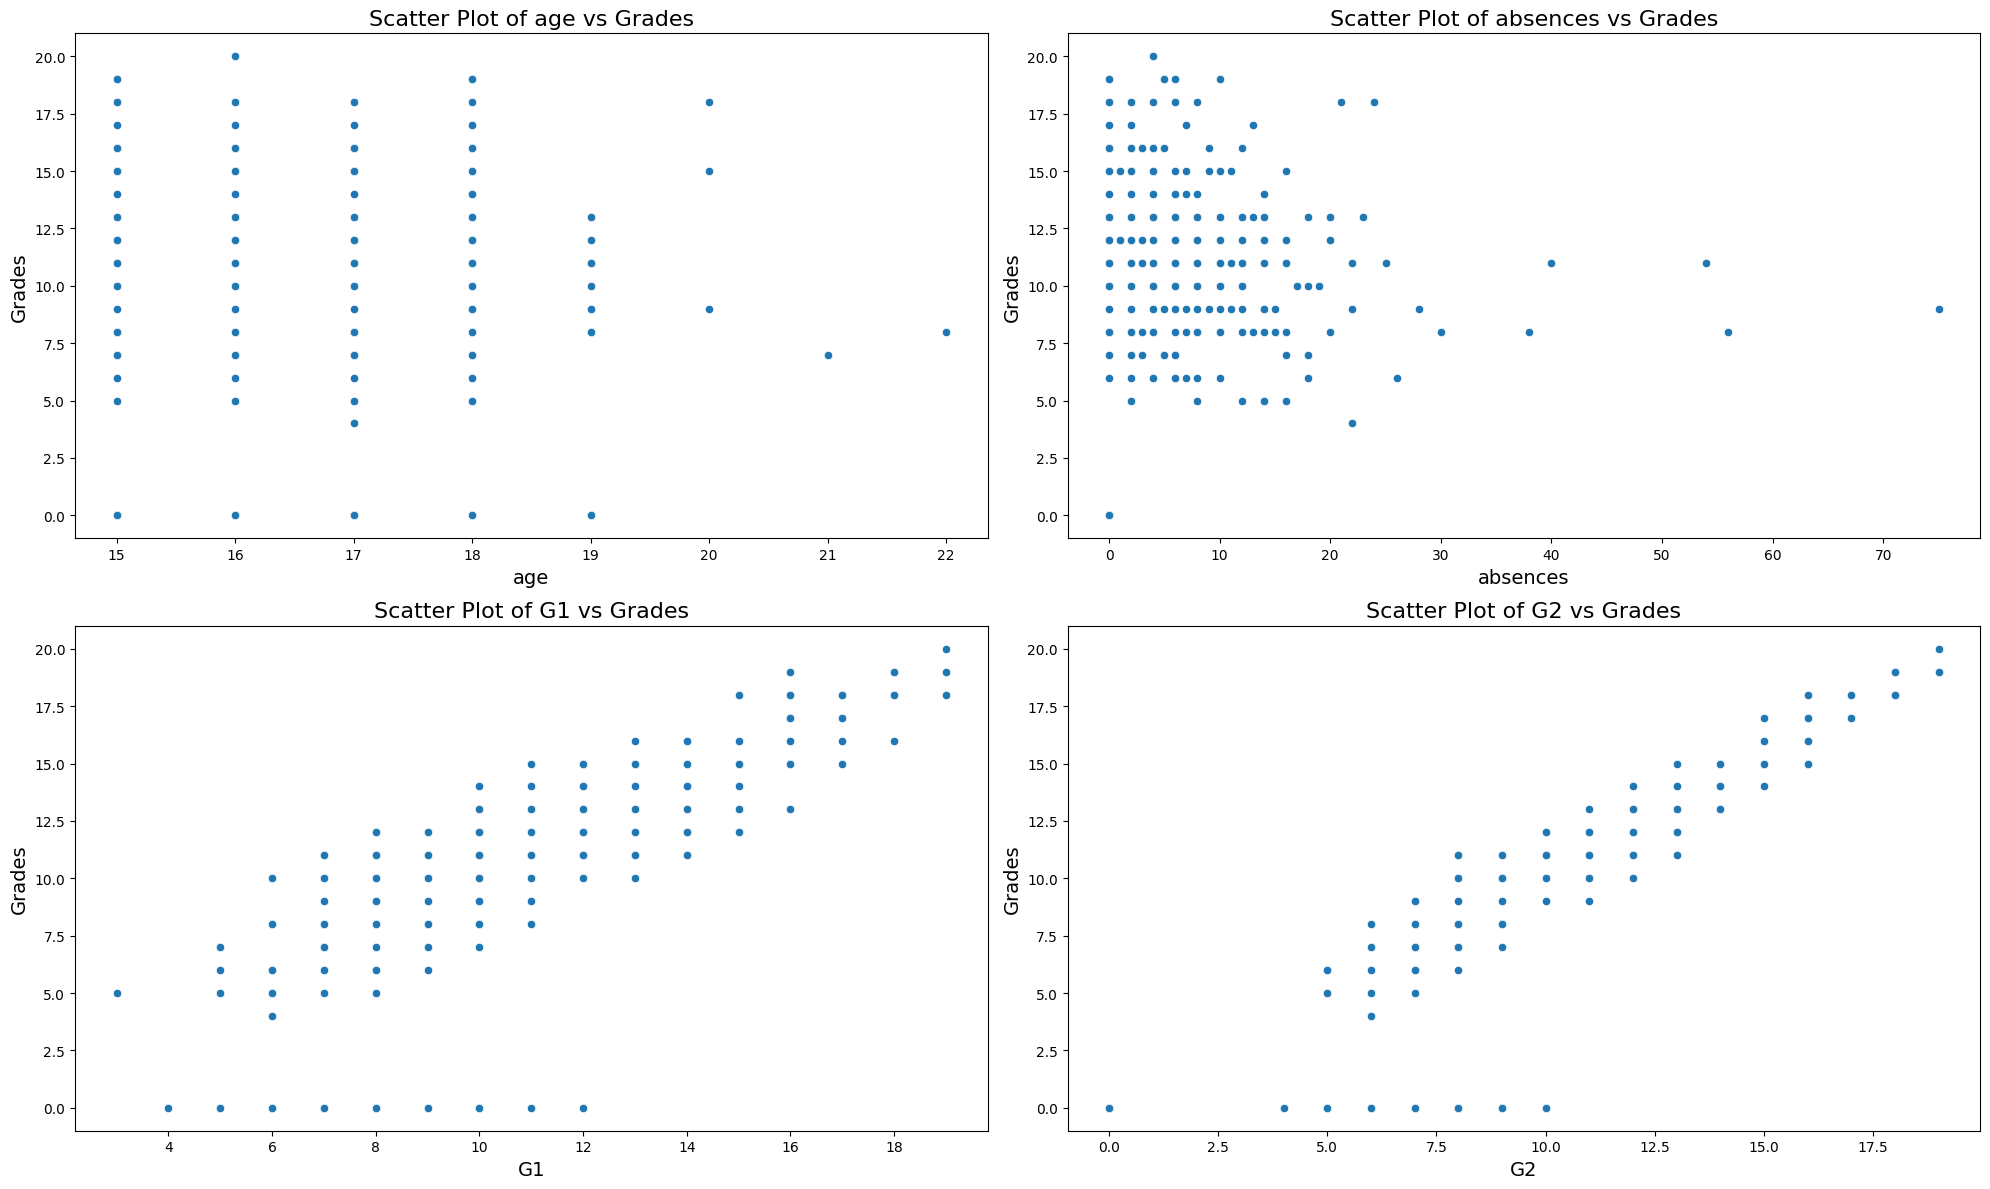

In [ ]:
cols = df.columns[26:30]  # Adjusting index to include columns from 27 to 30

# Create subplots: Adjust rows and columns based on the number of numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))  # 2x2 grid for 4 variables

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over numerical columns and create a scatter plot for each
for i, ax in zip(cols, axes):
    sns.scatterplot(x=df[i], y=df['G3'], ax=ax)  # Scatter plot of independent variable vs grades
    ax.set_title(f'Scatter Plot of {i} vs Grades', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Grades', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
co = df.iloc[:,26:31]
pd.DataFrame(co.corr(numeric_only=True))

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


**Splitting of Training and Test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 26:] = sc.fit_transform(X_train[:, 26:])
X_test[:, 26:] = sc.transform(X_test[:, 26:])
print(X_train)
print(X_test)

[[0.0 1.0 0.0 ... -0.6746582164971658 0.6136195264740169
  0.5811869668706116]
 [1.0 0.0 0.0 ... -0.6746582164971658 -0.2799462355803115
  -0.4306867605735383]
 [0.0 1.0 0.0 ... -0.43170437443095 -0.2799462355803115
  -0.17771832871250082]
 ...
 [1.0 0.0 1.0 ... -0.43170437443095 -0.8756567436165305
  -1.1895920561566506]
 [0.0 1.0 0.0 ... 0.5401109938339134 0.01790901843779795
  -0.4306867605735383]
 [0.0 1.0 1.0 ... 0.17568023073458963 1.2093300345102358
  1.340092262453724]]
[[1.0 0.0 0.0 ... -0.6746582164971658 -1.4713672516527494
  -0.9366236242956132]
 [1.0 0.0 1.0 ... 1.390449441065669 -0.2799462355803115
  -0.17771832871250082]
 [0.0 1.0 0.0 ... 1.268972520032561 -1.4713672516527494
  -0.6836551924345757]
 ...
 [1.0 0.0 0.0 ... -0.6746582164971658 0.01790901843779795
  0.07525010314853664]
 [0.0 1.0 0.0 ... -0.43170437443095 0.9114747804921263 0.5811869668706116]
 [1.0 0.0 0.0 ... 0.05420330970148172 0.3157642724559074
  0.3282185350095741]]


**Training the Multiple Linear Regression model on the Training set**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the test results**

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5.14  0.  ]
 [10.6  10.  ]
 [ 5.56  8.  ]
 [ 8.53 10.  ]
 [ 9.45 10.  ]
 [10.54 12.  ]
 [ 6.65  8.  ]
 [12.64 11.  ]
 [10.54 11.  ]
 [ 7.46  8.  ]
 [11.99 11.  ]
 [13.62 13.  ]
 [ 6.17  8.  ]
 [ 8.89  7.  ]
 [ 8.26 10.  ]
 [11.17 10.  ]
 [16.25 15.  ]
 [16.28 16.  ]
 [ 6.13  8.  ]
 [ 9.39 10.  ]
 [10.71 11.  ]
 [18.37 19.  ]
 [ 9.75 10.  ]
 [11.89 11.  ]
 [15.73 16.  ]
 [ 5.14  5.  ]
 [11.71 11.  ]
 [ 7.74  9.  ]
 [ 9.21 10.  ]
 [12.68 13.  ]
 [10.92 12.  ]
 [12.27 11.  ]
 [ 5.63 10.  ]
 [10.56 11.  ]
 [12.28 14.  ]
 [ 8.6   8.  ]
 [10.8  10.  ]
 [ 8.13 10.  ]
 [ 7.2   7.  ]
 [10.01 10.  ]
 [ 9.13  9.  ]
 [11.05  9.  ]
 [16.44 15.  ]
 [ 4.91  9.  ]
 [ 9.98 11.  ]
 [11.77 13.  ]
 [19.44 18.  ]
 [ 8.48  9.  ]
 [13.02 14.  ]
 [ 8.33 10.  ]
 [ 5.09  5.  ]
 [12.51 10.  ]
 [10.   11.  ]
 [ 5.19  6.  ]
 [ 7.31  6.  ]
 [10.86 11.  ]
 [ 6.64  6.  ]
 [15.68 15.  ]
 [ 9.4  10.  ]
 [ 3.48  0.  ]
 [ 5.73  0.  ]
 [ 8.54  0.  ]
 [10.39 13.  ]
 [15.37 17.  ]
 [14.1  13.  ]
 [ 8.93  8.  ]
 [10.69 10

**Accuracy Measures**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R²: {r2}')

Mean Absolute Error (MAE): 1.276689575157996
Mean Squared Error (MSE): 3.475372775414755
Root Mean Squared Error (RMSE): 1.8642351717030647
R²: 0.745800793528778


**Support Vector Regression**

In [ ]:
y_trains = y_train.reshape(len(y_train),1)
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_trains)
svr_pred = svr.predict(X_test)
print(np.concatenate((svr_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7.47  0.  ]
 [10.08 10.  ]
 [ 9.76  8.  ]
 [ 9.77 10.  ]
 [10.18 10.  ]
 [10.63 12.  ]
 [ 8.55  8.  ]
 [13.47 11.  ]
 [11.31 11.  ]
 [ 9.1   8.  ]
 [12.31 11.  ]
 [13.03 13.  ]
 [ 6.56  8.  ]
 [ 7.18  7.  ]
 [ 8.04 10.  ]
 [12.63 10.  ]
 [16.01 15.  ]
 [13.55 16.  ]
 [ 7.05  8.  ]
 [ 9.81 10.  ]
 [11.47 11.  ]
 [16.98 19.  ]
 [ 9.42 10.  ]
 [11.14 11.  ]
 [15.18 16.  ]
 [ 8.02  5.  ]
 [11.67 11.  ]
 [ 9.86  9.  ]
 [ 9.13 10.  ]
 [11.51 13.  ]
 [12.34 12.  ]
 [12.79 11.  ]
 [ 9.   10.  ]
 [11.84 11.  ]
 [13.49 14.  ]
 [ 8.57  8.  ]
 [11.37 10.  ]
 [ 9.28 10.  ]
 [ 9.54  7.  ]
 [11.27 10.  ]
 [10.3   9.  ]
 [10.5   9.  ]
 [16.07 15.  ]
 [ 9.72  9.  ]
 [11.35 11.  ]
 [13.4  13.  ]
 [16.14 18.  ]
 [ 9.49  9.  ]
 [13.67 14.  ]
 [ 9.23 10.  ]
 [ 7.15  5.  ]
 [12.23 10.  ]
 [11.29 11.  ]
 [ 7.59  6.  ]
 [ 8.86  6.  ]
 [11.42 11.  ]
 [ 7.53  6.  ]
 [15.09 15.  ]
 [ 9.26 10.  ]
 [ 7.02  0.  ]
 [ 7.93  0.  ]
 [ 9.6   0.  ]
 [10.36 13.  ]
 [15.11 17.  ]
 [14.17 13.  ]
 [ 9.04  8.  ]
 [11.88 10

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mae_s = mean_absolute_error(y_test, svr_pred)
mse_s = mean_squared_error(y_test, svr_pred)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test, svr_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_s}')
print(f'Mean Squared Error (MSE): {mse_s}')
print(f'Root Mean Squared Error (RMSE): {rmse_s}')
print(f'R²: {r2_s}')

Mean Absolute Error (MAE): 1.430914417184656
Mean Squared Error (MSE): 4.980565340847748
Root Mean Squared Error (RMSE): 2.231718024493181
R²: 0.6357064869766451


**Random Forest**

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(np.concatenate((rf_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
mae_r = mean_absolute_error(y_test, rf_pred)
mse_r = mean_squared_error(y_test, rf_pred)
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(y_test, rf_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_r}')
print(f'Mean Squared Error (MSE): {mse_r}')
print(f'Root Mean Squared Error (RMSE): {rmse_r}')
print(f'R²: {r2_r}')

[[ 4.7  0. ]
 [10.1 10. ]
 [ 8.   8. ]
 [ 9.2 10. ]
 [ 3.8 10. ]
 [10.9 12. ]
 [ 7.9  8. ]
 [12.3 11. ]
 [11.2 11. ]
 [ 8.5  8. ]
 [12.8 11. ]
 [14.3 13. ]
 [ 7.   8. ]
 [ 8.8  7. ]
 [ 9.4 10. ]
 [11.3 10. ]
 [15.1 15. ]
 [15.9 16. ]
 [ 5.   8. ]
 [10.1 10. ]
 [11.3 11. ]
 [18.  19. ]
 [10.6 10. ]
 [12.  11. ]
 [15.5 16. ]
 [ 5.4  5. ]
 [11.4 11. ]
 [ 8.8  9. ]
 [ 9.7 10. ]
 [13.2 13. ]
 [12.8 12. ]
 [12.1 11. ]
 [ 8.5 10. ]
 [10.7 11. ]
 [12.8 14. ]
 [ 8.9  8. ]
 [11.4 10. ]
 [ 9.  10. ]
 [ 9.2  7. ]
 [10.9 10. ]
 [ 9.8  9. ]
 [10.8  9. ]
 [15.4 15. ]
 [ 8.2  9. ]
 [10.5 11. ]
 [12.5 13. ]
 [18.1 18. ]
 [10.   9. ]
 [13.4 14. ]
 [ 9.3 10. ]
 [ 5.1  5. ]
 [12.  10. ]
 [11.3 11. ]
 [ 5.6  6. ]
 [ 7.3  6. ]
 [10.4 11. ]
 [ 7.2  6. ]
 [15.9 15. ]
 [10.2 10. ]
 [ 0.   0. ]
 [ 4.8  0. ]
 [ 2.8  0. ]
 [12.6 13. ]
 [15.4 17. ]
 [14.6 13. ]
 [ 8.9  8. ]
 [11.3 10. ]
 [15.3 15. ]
 [ 9.   9. ]
 [ 9.6 10. ]
 [15.  16. ]
 [11.2 12. ]
 [11.7 12. ]
 [13.7 14. ]
 [11.5 12. ]
 [ 9.2 11. ]
 [10.4 10. ]

**GridSearchCV**

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available CPU cores
)
grid_search.fit(X, y)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= None, min_samples_split = 2, n_estimators = 50)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(np.concatenate((rf_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
mae_r = mean_absolute_error(y_test, rf_pred)
mse_r = mean_squared_error(y_test, rf_pred)
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(y_test, rf_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_r}')
print(f'Mean Squared Error (MSE): {mse_r}')
print(f'Root Mean Squared Error (RMSE): {rmse_r}')
print(f'R²: {r2_r}')

[[ 4.    0.  ]
 [10.06 10.  ]
 [ 8.48  8.  ]
 [ 9.28 10.  ]
 [ 4.3  10.  ]
 [11.26 12.  ]
 [ 7.78  8.  ]
 [12.02 11.  ]
 [11.52 11.  ]
 [ 8.58  8.  ]
 [12.36 11.  ]
 [14.5  13.  ]
 [ 6.94  8.  ]
 [ 9.04  7.  ]
 [ 9.78 10.  ]
 [11.58 10.  ]
 [15.18 15.  ]
 [15.88 16.  ]
 [ 3.52  8.  ]
 [ 9.5  10.  ]
 [11.4  11.  ]
 [18.1  19.  ]
 [10.14 10.  ]
 [11.82 11.  ]
 [15.9  16.  ]
 [ 6.02  5.  ]
 [11.1  11.  ]
 [ 8.84  9.  ]
 [ 9.66 10.  ]
 [13.24 13.  ]
 [12.24 12.  ]
 [12.24 11.  ]
 [ 8.6  10.  ]
 [10.98 11.  ]
 [12.5  14.  ]
 [ 8.7   8.  ]
 [11.24 10.  ]
 [ 9.6  10.  ]
 [ 8.7   7.  ]
 [11.3  10.  ]
 [ 9.52  9.  ]
 [10.86  9.  ]
 [16.24 15.  ]
 [ 8.56  9.  ]
 [10.46 11.  ]
 [12.66 13.  ]
 [18.06 18.  ]
 [ 9.82  9.  ]
 [13.48 14.  ]
 [ 9.14 10.  ]
 [ 5.32  5.  ]
 [11.96 10.  ]
 [11.18 11.  ]
 [ 6.08  6.  ]
 [ 7.    6.  ]
 [ 9.86 11.  ]
 [ 6.68  6.  ]
 [15.76 15.  ]
 [10.   10.  ]
 [ 0.46  0.  ]
 [ 4.3   0.  ]
 [ 3.48  0.  ]
 [12.4  13.  ]
 [15.82 17.  ]
 [14.48 13.  ]
 [ 8.82  8.  ]
 [11.38 10